Successfully read: Electrolysis.txt
Successfully read: Test.xlsx
Files in before_test: ['CV_before_1.txt', 'CV_before_2.txt', 'CV_before_3.txt', 'CV_before_4.txt', 'CV_before_5.txt', 'CV_before_6.txt', 'EIS_before.txt', 'OCP_before.txt']
Successfully read: CV_before_1.txt
Successfully read: CV_before_2.txt
Successfully read: CV_before_3.txt
Successfully read: CV_before_4.txt
Successfully read: CV_before_5.txt
Successfully read: CV_before_6.txt
Successfully read: EIS_before.txt
Successfully read: OCP_before.txt
Files in after_test: ['CV_after_1.txt', 'CV_after_2.txt', 'CV_after_3.txt', 'CV_after_4.txt', 'CV_after_5.txt', 'CV_after_6.txt', 'EIS_after.txt', 'OCP_after.txt']
Successfully read: CV_after_1.txt
Successfully read: CV_after_2.txt
Successfully read: CV_after_3.txt
Successfully read: CV_after_4.txt
Successfully read: CV_after_5.txt
Successfully read: CV_after_6.txt
Successfully read: EIS_after.txt
Successfully read: OCP_after.txt
Keys loaded: dict_keys(['Electrolysis', 'Test', 'b

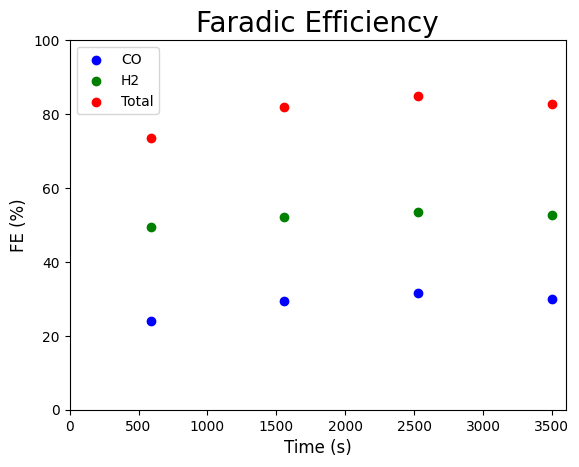

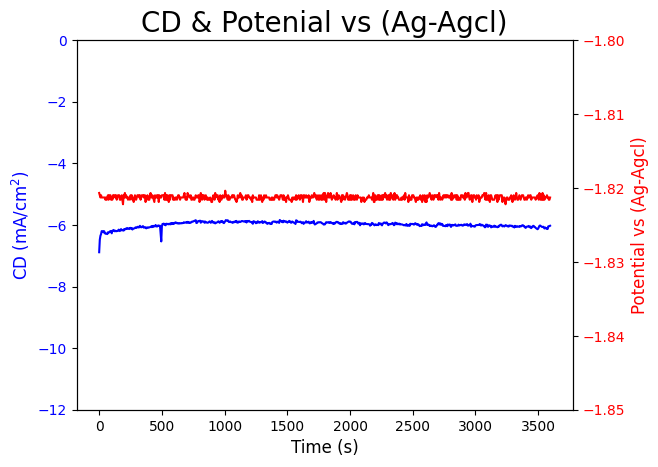

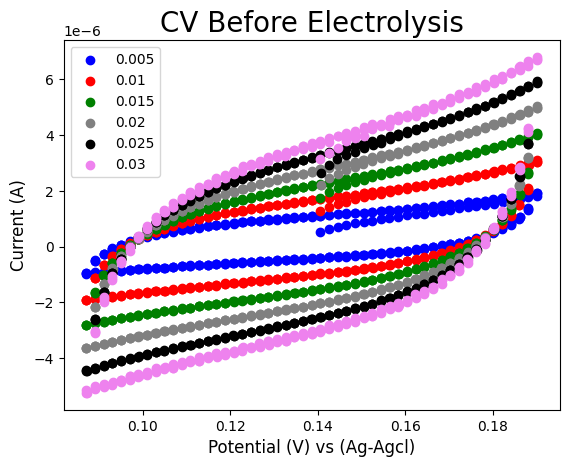

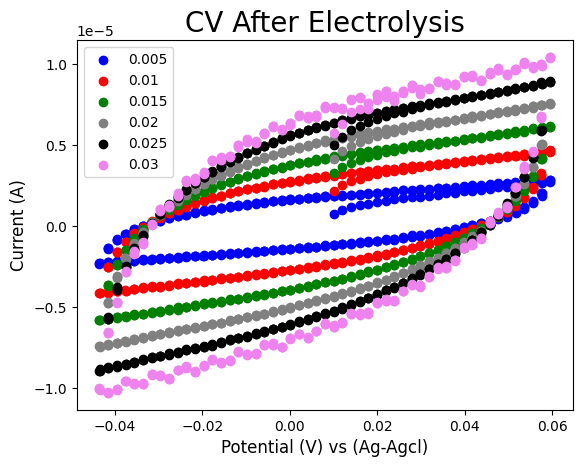

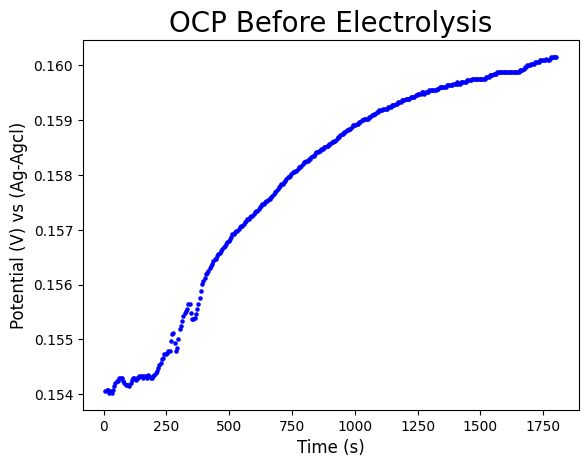

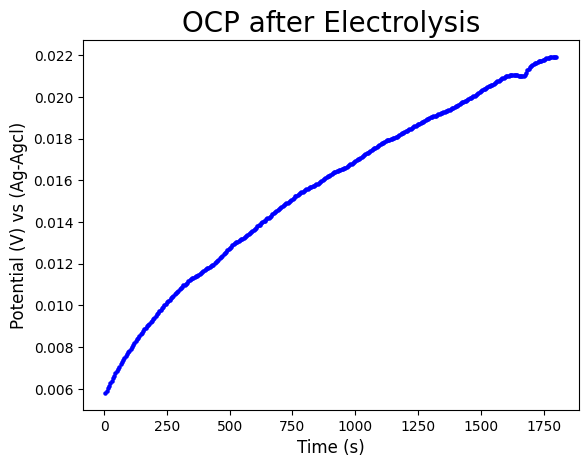

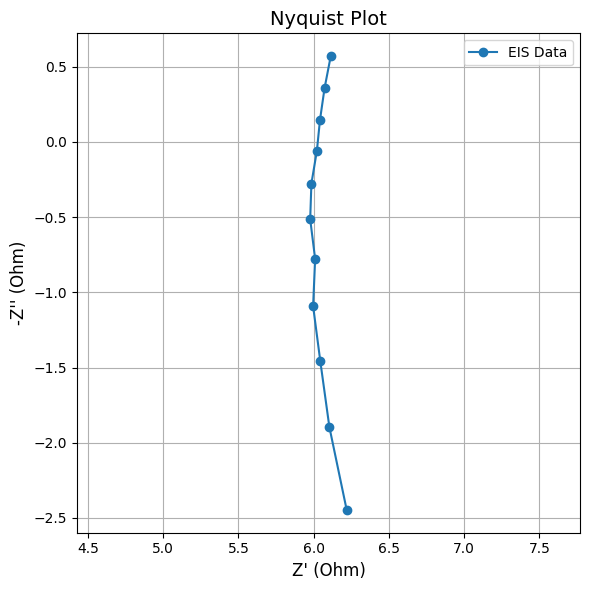

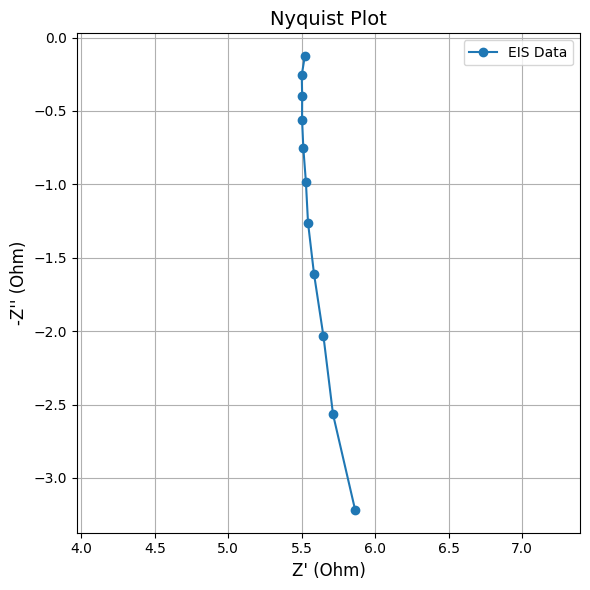

In [183]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def read_all_data(main_folder_path):
    data = {}

    # Read Electrolysis.txt
    electrolysis_path = os.path.join(main_folder_path, "Electrolysis.txt")
    try:
        data["Electrolysis"] = pd.read_csv(electrolysis_path, encoding='utf-8-sig', sep=None, engine='python')
        print("Successfully read: Electrolysis.txt")
    except Exception as e:
        print(f"Could not read Electrolysis.txt: {e}")

    # Read Test.xlsx
    test_excel_path = os.path.join(main_folder_path, 'Test.xlsx')
    if os.path.exists(test_excel_path):
        try:
            data['Test'] = pd.read_excel(test_excel_path, engine='openpyxl')
            print("Successfully read: Test.xlsx")
        except Exception as e:
            print(f"Could not read Test.xlsx: {e}")
    else:
        print("Test.xlsx not found.")

    # Helper function to read files in a folder and store in dict with prefix
    def read_files_from_folder(folder_path, prefix):
        if not os.path.exists(folder_path):
            print(f"Folder not found: {folder_path}")
            return
        files = os.listdir(folder_path)
        print(f"Files in {os.path.basename(folder_path)}: {files}")
        for filename in files:
            file_path = os.path.join(folder_path, filename)
            if os.path.isfile(file_path):
                try:
                    # Read as CSV with utf-8-sig encoding, auto-detect separator
                    df = pd.read_csv(file_path, encoding='utf-8-sig', sep=None, engine='python')
                    key = f"{prefix}_{filename}"
                    data[key] = df
                    print(f"Successfully read: {filename}")
                except Exception as e:
                    print(f"Could not read {filename} in {os.path.basename(folder_path)}: {e}")

    # Read files in before_test folder
    before_folder = os.path.join(main_folder_path, 'before_test')
    read_files_from_folder(before_folder, prefix='before')

    # Read files in after_test folder
    after_folder = os.path.join(main_folder_path, 'after_test')
    read_files_from_folder(after_folder, prefix='after')

    print("Keys loaded:", data.keys())
    return data

# --- Call the function outside ---
folder_path = 'C:/Users/uqppate9/OneDrive - The University of Queensland/19052025_H_cell_test_silver_foil'
all_data = read_all_data(folder_path)
print("Keys loaded:", all_data.keys())

#Electrolysis & Test file data please close all the files before you run this code
Electrolysis_data = all_data['Electrolysis']
Test_data = all_data['Test']

#CV data before electrolysis
CV_before_1_data = all_data['before_CV_before_1.txt'] 
CV_before_2_data = all_data['before_CV_before_2.txt']
CV_before_3_data = all_data['before_CV_before_3.txt']
CV_before_4_data = all_data['before_CV_before_4.txt']
CV_before_5_data = all_data['before_CV_before_5.txt']
CV_before_6_data = all_data['before_CV_before_6.txt']

#OCP data before electrolysis
OCP_before_data = all_data['before_OCP_before.txt'] 

#OCP data before electrolysis
EIS_before_data = all_data['before_EIS_before.txt'] 

#CV data after electrolysis
CV_after_1_data = all_data['after_CV_after_1.txt']
CV_after_2_data = all_data['after_CV_after_2.txt']
CV_after_3_data = all_data['after_CV_after_3.txt']
CV_after_4_data = all_data['after_CV_after_4.txt']
CV_after_5_data = all_data['after_CV_after_5.txt']
CV_after_6_data = all_data['after_CV_after_6.txt']

#OCP data before electrolysis
OCP_after_data = all_data['after_OCP_after.txt'] 

#OCP data before electrolysis
EIS_after_data = all_data['after_EIS_after.txt'] 

#Extracting data from test file
Col_10 = Test_data.iloc[2:, 13]  # Extract column 14 (index 13), skip first two rows, and drop NaN, start from 2nd row
H2_gc_peaks = Col_10.dropna().values  # drop Nan value rows
Len_col = len(H2_gc_peaks) # Get the length

# Get CO, CH4, C2H4 peaks: columns 15-17 (indices 14-16), rows 4 to Len_col+3 (0-based = rows 3 to Len_col+2)
CO_gc_peaks = Test_data.iloc[5:Len_col+5, 14].values
CH4_gc_peaks = Test_data.iloc[5:Len_col+5, 15].values
C2H4_gc_peaks = Test_data.iloc[5:Len_col+5, 16].values

# Flow rate column (column 18 -> index 17) divided by 60
Flow_rate_ml_s = Test_data.iloc[5:Len_col+5, 17].values / 60

# Temperature (column 20 -> index 19)
Temperature = Test_data.iloc[5:Len_col+5, 19].values

# Area of electrode (row 2 -> index 1, column 2 -> index 1)
Area_electrode = Test_data.iloc[3, 1]

# Time passed and time remaining: columns 10 and 11 (indices 9 and 10)
Time_passed = Test_data.iloc[5:Len_col+5, 9].values
Time_remains = Test_data.iloc[5:Len_col+5, 10].values

# GC start times (column 12 -> index 11)
GC_starts = Test_data.iloc[5:Len_col+5, 11].values



#get the charges corresponding to the passed time
def get_charge(target_times, data_matrix):
    # Extract time (column 4) and charge (column 5) – 0-based indexing
    data_times = data_matrix.iloc[0:, 3]
    data_charges = data_matrix.iloc[0:, 4]

    # Initialize output array
    charge_values = np.zeros(len(target_times))

    # Loop through each target time
    for i, t in enumerate(target_times):
        idx = np.argmin(np.abs(data_times - t))
        charge_values[i] = data_charges[idx]

    return charge_values


# Get the charge corresponding to Time_passed
charges = get_charge(Time_passed, Electrolysis_data)  # Electrolysis data assumed at index 8

# Compute average current (C/s = A)
Avg_current = charges / Time_passed

# Compute current density (mA/cm^2)
Current_density = Avg_current * 1000 / Area_electrode

#calculate faradic efficiency
def cal_FE(flow_rate_mls, H2_gc_peak, avg_current, Temp, calibrated_H2):
    # Ensure all inputs are NumPy arrays
    flow_rate_mls = np.asarray(flow_rate_mls)
    H2_gc_peak = np.asarray(H2_gc_peak)
    avg_current = np.asarray(avg_current)
    Temp = np.asarray(Temp)
    calibrated_H2 = np.asarray(calibrated_H2)

    # Check if all input arrays are the same length
    if not (len(flow_rate_mls) == len(H2_gc_peak) == len(avg_current) == len(Temp)):
        raise ValueError("All input arrays must be the same length.")

    # Constants
    P = 101325            # Pressure in Pa
    F = 96485             # Faraday's constant (C/mol)
    R = 8.314             # Universal gas constant (J/mol·K)
    factor = (2 * P * F) / R * 1e-6  # Combine constants and convert μA to A

    # Compute Faradaic Efficiency
    FE = abs((factor * (flow_rate_mls * H2_gc_peak / calibrated_H2 / 100) / (avg_current * (Temp + 273.15)))*100)

    return FE

caliberated_H2 = 34918.09495;
caliberated_CO = 122137941.621185;
caliberated_CH4 = 125769795.8;
caliberated_C2H4 = 209871025;

FE_result_H2 = cal_FE(Flow_rate_ml_s, H2_gc_peaks, Avg_current, Temperature, caliberated_H2);
FE_result_CO = cal_FE(Flow_rate_ml_s, CO_gc_peaks, Avg_current, Temperature, caliberated_CO);
FE_result_CH4 = cal_FE(Flow_rate_ml_s, CH4_gc_peaks, Avg_current, Temperature, caliberated_CH4);
FE_result_C2H4 = cal_FE(Flow_rate_ml_s, C2H4_gc_peaks, Avg_current, Temperature, caliberated_C2H4);
FE_total = FE_result_H2 + FE_result_CO + FE_result_CH4 + FE_result_C2H4
# calculation for current density
Multiplication_factor = 2; # change it as you change the area of electrode
CD_result = Electrolysis_data.iloc[:,2] * 1000/(Multiplication_factor*Area_electrode)
Corrected_time = Electrolysis_data.iloc[:,3]


#FE Plot
plt.figure()
plt.scatter(Time_passed, FE_result_CO, label='CO', color='blue', marker='o')
plt.scatter(Time_passed, FE_result_H2, label='H2', color='green', marker='o')
plt.scatter(Time_passed, FE_total, label='Total', color='red', marker='o')
plt.title('Faradic Efficiency', fontsize=20, color='black')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('FE (%)', fontsize=12)
plt.legend(loc='upper left')  # or 'lower right', 'best', etc.
plt.ylim(0, 100)
plt.xlim(0, 3600)
# Save the plot as an image file (PNG, JPG, PDF, etc.)
plt.savefig("FE_plot.png", dpi=300, bbox_inches='tight')  # Save before show
plt.show()

#CD Plot
fig, ax1 = plt.subplots()
# Plot on left y-axis
ax1.plot(Corrected_time, CD_result, color='blue', label='y = x²')
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('CD (mA/cm$^2$)', color='blue', fontsize=12 )
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(-12,0)
# Create second y-axis
ax2 = ax1.twinx()
# Plot on right y-axis
ax2.plot(Corrected_time, Electrolysis_data.iloc[:,1], color='red', label='y = 10x')
ax2.set_ylabel('Potential vs (Ag-Agcl)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(-1.85, -1.8)
plt.title('CD & Potenial vs (Ag-Agcl)',fontsize=20, color='black') # Add title
# Save the plot as an image file (PNG, JPG, PDF, etc.)
plt.savefig("Current density_&_Potential.png", dpi=300, bbox_inches='tight')  # Save before show
plt.show() # Show plot

#CV plots before electrolysis
plt.figure()
plt.scatter(CV_before_1_data.iloc[:,1], CV_before_1_data.iloc[:,2], label='0.005', color='blue', marker='o')
plt.scatter(CV_before_2_data.iloc[:,1], CV_before_2_data.iloc[:,2], label='0.01', color='red', marker='o')
plt.scatter(CV_before_3_data.iloc[:,1], CV_before_3_data.iloc[:,2], label='0.015', color='green', marker='o')
plt.scatter(CV_before_4_data.iloc[:,1], CV_before_4_data.iloc[:,2], label='0.02', color='gray', marker='o')
plt.scatter(CV_before_5_data.iloc[:,1], CV_before_5_data.iloc[:,2], label='0.025', color='black', marker='o')
plt.scatter(CV_before_6_data.iloc[:,1], CV_before_6_data.iloc[:,2], label='0.03', color='violet', marker='o')
plt.title('CV Before Electrolysis', fontsize=20, color='black')
plt.xlabel('Potential (V) vs (Ag-Agcl)', fontsize=12)
plt.ylabel('Current (A)', fontsize=12)
plt.legend(loc='upper left')  # or 'lower right', 'best', etc.
# plt.ylim(0, 100)
# plt.xlim(0, 3600)
# Save the plot as an image file (PNG, JPG, PDF, etc.)
plt.savefig("CV_before_electrolysis.png", dpi=300, bbox_inches='tight')  # Save before show
plt.show()

#CV plots after electrolysis
plt.figure()
plt.scatter(CV_after_1_data.iloc[:,1], CV_after_1_data.iloc[:,2], label='0.005', color='blue', marker='o')
plt.scatter(CV_after_2_data.iloc[:,1], CV_after_2_data.iloc[:,2], label='0.01', color='red', marker='o')
plt.scatter(CV_after_3_data.iloc[:,1], CV_after_3_data.iloc[:,2], label='0.015', color='green', marker='o')
plt.scatter(CV_after_4_data.iloc[:,1], CV_after_4_data.iloc[:,2], label='0.02', color='gray', marker='o')
plt.scatter(CV_after_5_data.iloc[:,1], CV_after_5_data.iloc[:,2], label='0.025', color='black', marker='o')
plt.scatter(CV_after_6_data.iloc[:,1], CV_after_6_data.iloc[:,2], label='0.03', color='violet', marker='o')
plt.title('CV After Electrolysis', fontsize=20, color='black')
plt.xlabel('Potential (V) vs (Ag-Agcl)', fontsize=12)
plt.ylabel('Current (A)', fontsize=12)
plt.legend(loc='upper left')  # or 'lower right', 'best', etc.
# plt.ylim(0, 100)
# plt.xlim(0, 3600)
# Save the plot as an image file (PNG, JPG, PDF, etc.)
plt.savefig("CV_after_electrolysis.png", dpi=300, bbox_inches='tight')  # Save before show
plt.show()


#OCP plots before electrolysis
plt.figure()
plt.scatter(OCP_before_data.iloc[:,0], OCP_before_data.iloc[:,1], color='blue', marker='o', s=5)
plt.title('OCP Before Electrolysis', fontsize=20, color='black')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Potential (V) vs (Ag-Agcl)', fontsize=12)
# plt.ylim(0, 100)
# plt.xlim(0, 3600)
# Save the plot as an image file (PNG, JPG, PDF, etc.)
plt.savefig("OCP_before_electrolysis.png", dpi=300, bbox_inches='tight')  # Save before show
plt.show()

#OCP plots after electrolysis
plt.figure()
plt.scatter(OCP_after_data.iloc[:,0], OCP_after_data.iloc[:,1], color='blue', marker='o', s=5)
plt.title('OCP after Electrolysis', fontsize=20, color='black')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Potential (V) vs (Ag-Agcl)', fontsize=12)
# plt.ylim(0, 100)
# plt.xlim(0, 3600)
# Save the plot as an image file (PNG, JPG, PDF, etc.)
plt.savefig("OCP_after_electrolysis.png", dpi=300, bbox_inches='tight')  # Save before show
plt.show()

#EIS plot before electrolysis
plt.figure(figsize=(6,6))
plt.plot(EIS_before_data.iloc[:,1], EIS_before_data.iloc[:,2], 'o-', label='EIS Data')  # -Z_imag flips to positive for Nyquist
plt.xlabel('Z\' (Ohm)', fontsize=12)
plt.ylabel('-Z\'\' (Ohm)', fontsize=12)
plt.title('Nyquist Plot', fontsize=14)
plt.grid(True)
plt.axis('equal')  # For square aspect ratio
plt.legend()
plt.tight_layout()
plt.show()

#EIS plot after electrolysis
plt.figure(figsize=(6,6))
plt.plot(EIS_after_data.iloc[:,1], EIS_after_data.iloc[:,2], 'o-', label='EIS Data')  # -Z_imag flips to positive for Nyquist
plt.xlabel('Z\' (Ohm)', fontsize=12)
plt.ylabel('-Z\'\' (Ohm)', fontsize=12)
plt.title('Nyquist Plot', fontsize=14)
plt.grid(True)
plt.axis('equal')  # For square aspect ratio
plt.legend()
plt.tight_layout()
plt.show()

In [172]:
# Print results
print("H2 GC Peaks:", H2_gc_peaks)
print("CO GC Peaks:", CO_gc_peaks)
print("CH4 GC Peaks:", CH4_gc_peaks)
print("C2H4 GC Peaks:", C2H4_gc_peaks)
print("Flow rate (ml/s):", Flow_rate_ml_s)
print("Temperature (°C):", Temperature)
print("Area of Electrode (cm^2):", Area_electrode)
print("Time Passed:", Time_passed)
print("Time Remaining:", Time_remains)
print("GC Start Times:", GC_starts)
print("FE_CO:", FE_result_H2)
print(C2H4_gc_peaks)
print(CO_gc_peaks)
print(Flow_rate_ml_s)
print(Avg_current)
print(Temperature)
print(FE_result_H2)
print(FE_result_CO)
print(FE_result_CH4)
print(FE_result_C2H4)
#print(Electrolysis_data.iloc[:,2])
print(CD_result)
print(CV_before_2_data.iloc[:,2])
print(OCP_after_data)
print(OCP_before_data)

H2 GC Peaks: [16967 17647 18115 17950]
CO GC Peaks: [28756858 34842889 37344236 35729457]
CH4 GC Peaks: [0 0 0 0]
C2H4 GC Peaks: [0 0 0 0]
Flow rate (ml/s): [0.35809523809523813 0.3566666666666667 0.3561904761904762
 0.35547619047619045]
Temperature (°C): [22.5 22.7 23.2 23.3]
Area of Electrode (cm^2): 2.3
Time Passed: [589 1557 2528 3500]
Time Remaining: [3011 2043 1072 100]
GC Start Times: [9.816666666666666 25.95 42.13333333333333 58.333333333333336]
FE_CO: [49.52150147839249 52.26858130611163 53.44096246168443 52.711178669080496]
[0 0 0 0]
[28756858 34842889 37344236 35729457]
[0.35809523809523813 0.3566666666666667 0.3561904761904762
 0.35547619047619045]
[-0.027949739595422924 -0.02741365671617219 -0.027440200878095018
 -0.0275021493094308]
[22.5 22.7 23.2 23.3]
[49.52150147839249 52.26858130611163 53.44096246168443 52.711178669080496]
[23.995517574656258 29.504205829524533 31.49629406923896
 29.996089148143064]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
0     -6.887021
1     -6.480341


In [55]:
print(Test_data.iloc[1:3, 13])

1    0.826
2      NaN
Name: GC, dtype: object
